### Q1


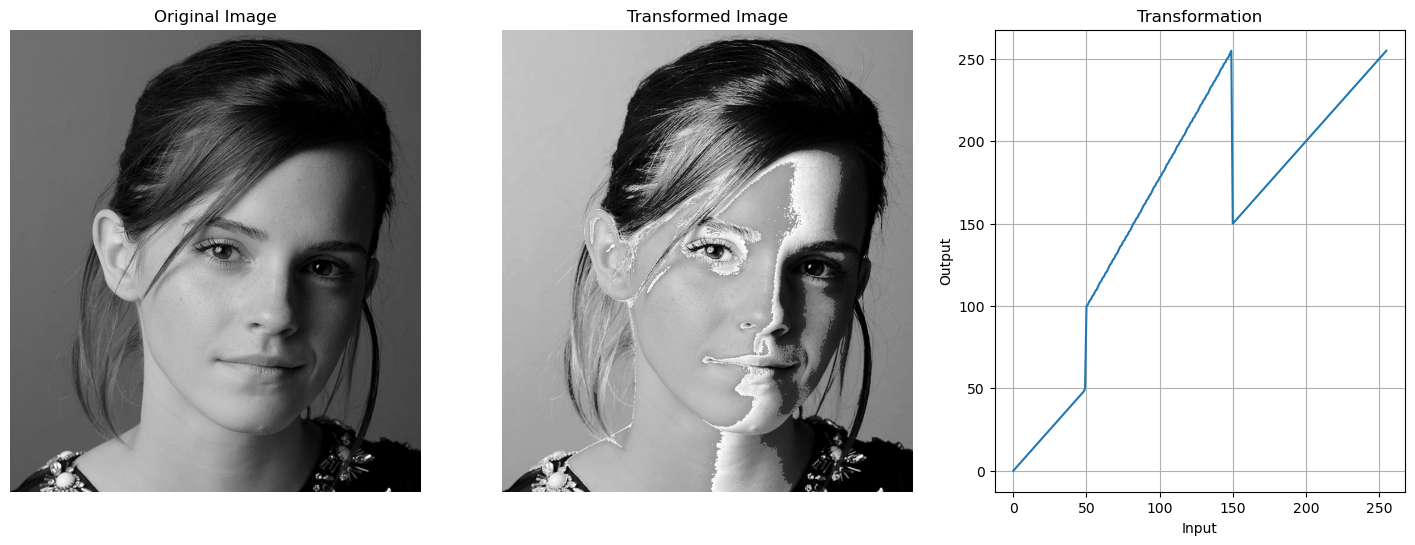

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

control_points = np.array([[50, 50], [50, 100], [150, 255], [150, 150]], dtype=np.uint8)

t1 = np.linspace(0, control_points[0, 1], control_points[0, 1] - 0).astype(np.uint8)
t2 = np.linspace(control_points[1, 1], control_points[2, 1], control_points[2, 0] - control_points[1, 0]).astype(np.uint8)
t3 = np.linspace(control_points[3, 1], 255, 255 - control_points[3, 0] + 1).astype(np.uint8)

transform = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
# print(len(transform))

transformed_image = cv.LUT(image, transform)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(transformed_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Transformed Image')
axs[1].axis('off')

axs[2].plot(transform)
axs[2].set_title('Transformation')
axs[2].set_xlabel('Input')
axs[2].set_ylabel('Output')
axs[2].grid()




### Q2(a)